In [1]:
import networkx as nx
from networkx.readwrite import json_graph
from fourlang.text_to_4lang import TextTo4lang
from graphviz import Source

In [43]:
text = "I like playing football."

In [44]:
text_to_4lang = TextTo4lang()

In [45]:
graph = text_to_4lang.process_text(text)

In [46]:
dot_graph = graph.to_dot()

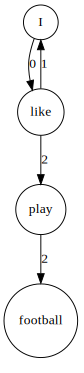

In [47]:
Source(dot_graph)